In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/carscx/cars.csv')

In [3]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [4]:
brand = df['brand'].value_counts().sort_values()
brand

brand
Ashok               1
Opel                1
Peugeot             1
MG                  3
Daewoo              3
Ambassador          4
Kia                 4
Isuzu               5
Land                6
Force               6
Mitsubishi         14
Jeep               31
Lexus              34
Audi               40
Fiat               47
Mercedes-Benz      54
Datsun             65
Volvo              67
Jaguar             71
Nissan             81
Skoda             105
BMW               120
Volkswagen        186
Renault           228
Chevrolet         230
Ford              397
Honda             467
Toyota            488
Tata              734
Mahindra          772
Hyundai          1415
Maruti           2448
Name: count, dtype: int64

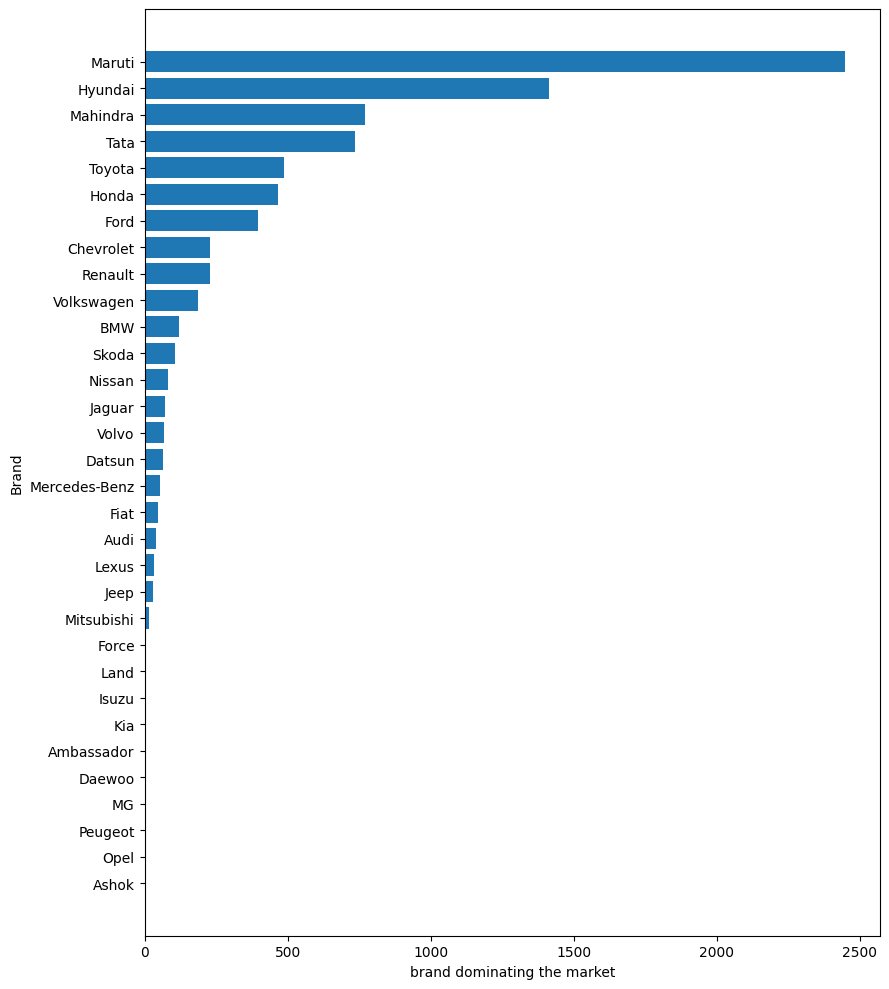

In [5]:
x = brand.index
y = brand.values
# index = df.brand.unique().shape
plt.figure(figsize=(9,10))
plt.barh(x,y)
plt.ylabel('Brand')
plt.xlabel('brand dominating the market')

plt.tight_layout()
plt.show()

In [6]:
print(df['brand'].nunique())
print(df['fuel'].nunique())
print(df['owner'].nunique())

32
4
5


In [7]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [8]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

# Using Pandas

In [9]:
pd.get_dummies(df,prefix=['own','fue'],drop_first=True,columns=['owner','fuel'],sparse =True,dtype=np.int32)

,brand,km_driven,selling_price,own_Fourth & Above Owner,own_Second Owner,own_Test Drive Car,own_Third Owner,fue_Diesel,fue_LPG,fue_Petrol
0,Maruti,145500,450000,0,0,0,0,1,0,0
1,Skoda,120000,370000,0,1,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,1
3,Hyundai,127000,225000,0,0,0,0,1,0,0
4,Maruti,120000,130000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,0,0,0,1
8124,Hyundai,119000,135000,1,0,0,0,1,0,0
8125,Maruti,120000,382000,0,0,0,0,1,0,0
8126,Tata,25000,290000,0,0,0,0,1,0,0


# Using Sklearn

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:4],df.iloc[:,-1],test_size = 0.2,random_state=2)

In [11]:
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe =  OneHotEncoder(drop='first',sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train[['fuel','owner']])
X_test_ohe = ohe.transform(X_test[['fuel','owner']])


In [14]:
chdf = np.hstack((X_train[['brand','km_driven']].values,X_train_ohe))
pd.DataFrame(chdf)

,0,1,2,3,4,5,6,7,8
0,Hyundai,35000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jeep,60000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hyundai,25000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Mahindra,130000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Hyundai,155000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6497,Ford,35000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6498,Maruti,120000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6499,Tata,15000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6500,Maruti,32500,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# One hot encoding for top category

In [15]:
t_ohe = OneHotEncoder(sparse_output=False)


In [16]:
brand = df['brand'].value_counts()
brand[brand<100].index

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Land', 'Force', 'Isuzu', 'Ambassador',
       'Kia', 'MG', 'Daewoo', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [17]:
filter = df['brand'].replace(brand[brand<100].index,'less_popular')

In [18]:
pd.get_dummies(filter,dtype=np.int32).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,less_popular
1264,0,0,0,0,0,0,1,0,0,0,0,0,0
3471,0,0,0,0,1,0,0,0,0,0,0,0,0
2178,0,0,0,0,0,0,1,0,0,0,0,0,0
2445,0,0,0,0,1,0,0,0,0,0,0,0,0
793,0,0,0,0,0,1,0,0,0,0,0,0,0
